In [1]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform
from numba import jit

In [2]:
path = "ML_HW06/image1.png"
img = cv2.imread(path)

In [3]:
row, col, channel = img.shape

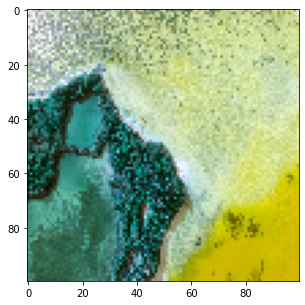

In [4]:
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

In [5]:
def RBFkernel(x1, x2, gamma):
    return np.exp(-gamma * (np.linalg.norm(x1 - x2) ** 2))

In [6]:
print(f'row: {row}, col: {col}, channel: {channel}')

row: 100, col: 100, channel: 3


In [7]:
SpatialInfo = [[i, j] for i in range(row) for j in range(row)]
SpatialInfo = np.array(SpatialInfo)
SpatialInfo

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ...,
       [99, 97],
       [99, 98],
       [99, 99]])

In [8]:
SpatialKernel = (-1/10000 * pdist(SpatialInfo, 'sqeuclidean'))
SpatialKernel

array([-0.0001, -0.0004, -0.0009, ..., -0.0001, -0.0004, -0.0001])

In [9]:
ImgInfo = img.reshape(row*col, channel)
ImgKernel = (-1/10000 * pdist(ImgInfo, 'sqeuclidean'))
ImgKernel.shape

(49995000,)

In [10]:
NewKernel = np.exp(SpatialKernel + ImgKernel)

In [11]:
Kernel = squareform(NewKernel)

In [12]:
k = 5
mean_index = []

for i in range(k):
    index = random.randint(0, row*col-1)
    while index in mean_index:
        index = random.randint(0, row*col-1)
    mean_index.append(index)

mean_index

[9298, 5027, 1526, 3813, 1162]

In [13]:
mean = Kernel[mean_index]

In [14]:
@jit
def Estep(Kernel, mean):
    classify = np.zeros((row*col, ))
    distance = np.zeros((k, ))
    for i in range(row*col):
        for j in range(k):
            distance[j] = np.linalg.norm(Kernel[i] - mean[j])
        classify[i] = distance.argmin()
        
    return classify

In [15]:
@jit
def Mstep(Kernel, classify):
    new_mean = np.zeros((k, row*col))
    for i in range(k):
        cluster = Kernel[classify == i]
        new_mean[i] = cluster.sum(axis = 0)
        if len(cluster) > 0:
            new_mean[i] /= len(cluster)
            
    return new_mean

In [16]:
flag = True
while flag:
    classify = Estep(Kernel, mean)
    new_mean = Mstep(Kernel, classify)
    print(np.linalg.norm(new_mean - mean))
    if np.linalg.norm(new_mean - mean) < 1:
        flag = False
    mean = new_mean

26.084682071237665
8.88557608656295
3.5787013309789524
2.1477703839990525
1.5793147914172614
1.0767626970288768
1.039243382969029
0.920452973020896


In [21]:
test = classify.reshape(100, 100)
for i in range(100):
    for j in range(100):
        print(int(test[i][j]), end="")
    print()

2222222242442222444224322234222444242244242322232443232222333442424322244444444424444422224424244424
2222222222422222222224422442344442222224222222244342442443424424422234444442244244242244424424242444
2222222222222222242244222222442442244224442224444324243244324444444222444444444444424424444424444444
2222222222422222222224222444224224244224442243432324232442444224444444444424444444444444442444444444
2222222242222222242224424422224222424222424442424242322242244424442444434444424424444444222444444424
2222222222222222224422224222422442422244442444442443442444244444444444224444444444244442442444442442
2222222222222232224222342424324322444424224222422442222444444444444244444444444444442444444244444444
2222222222222222222222224222224244442422224224442444422424344424444444444244244444444444444424444444
2222222222222222222244234224244424243422444444224444422422344444444444444424444442444444444444444444
2222222222222244443422222224222442244424432442444442444444424444444444444444424424444424444

3333133313333331333333333333333311111311211121122222222000000000000000000000000000000000000000000000
3333113133131333333333333333333331313133331111122224220000000000000000000000000000000000000000000000
3311131111131113333333333333333211133132113113222224000000000000000000000000000000000000000000000000
